In [97]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import datetime
import functions_hiwi as fct

In [98]:
main_dir = r'C:\Users\illic\Python\data_hiwi'

In [99]:
# set paths to specific data
WS100_rtu_path = os.path.join(main_dir, r'WS100_ready_to_use.csv')
WS300_rtu_path = os.path.join(main_dir, r'WS300_ready_to_use.csv')
Raine_rtu_path = os.path.join(main_dir, r'Raine_ready_to_use.csv')
L_pcp_rtu_path = os.path.join(main_dir, r'L_pcp_ready_to_use.csv')
lhg_rtu_path = os.path.join(main_dir, r'lhg_rtu.csv')

In [100]:
# read data

# read data and convert to utc
WS100_rtu = pd.read_csv(WS100_rtu_path, sep=',', index_col=0) # , skiprows=1
WS100_rtu.index = pd.to_datetime(WS100_rtu.index, format='%Y-%m-%d %H:%M:%S') # - pd.DateOffset(hours=1)

WS300_rtu = pd.read_csv(WS300_rtu_path, sep=',', index_col=0) # , skiprows=1
WS300_rtu.index = pd.to_datetime(WS300_rtu.index, format='%Y-%m-%d %H:%M:%S') # - pd.DateOffset(hours=1)

Raine_rtu = pd.read_csv(Raine_rtu_path, sep=',', index_col=0) # , skiprows=1
Raine_rtu.index = pd.to_datetime(Raine_rtu.index, format='%Y-%m-%d %H:%M:%S') # - pd.DateOffset(hours=1)

L_pcp_rtu = pd.read_csv(L_pcp_rtu_path, sep=',', index_col=0) # , skiprows=1
L_pcp_rtu.index = pd.to_datetime(L_pcp_rtu.index, format='%Y-%m-%d %H:%M:%S') # - pd.DateOffset(hours=1)

lhg_rtu = pd.read_csv(lhg_rtu_path, sep=',', index_col=0) # , skiprows=1
lhg_rtu.index = pd.to_datetime(lhg_rtu.index, format='%Y-%m-%d %H:%M:%S') + pd.DateOffset(hours=1)

In [101]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [102]:
# Ausreißer manuell auf np.nan setzen
WS100_rtu['precipitation.1'][WS100_rtu['precipitation.1'] == WS100_rtu['precipitation.1'].max()] = np.nan

WS100_rtu['precipitation.2'][WS100_rtu['precipitation.2'] == WS100_rtu['precipitation.2'].max()] = np.nan
WS100_rtu['precipitation.2'][WS100_rtu['precipitation.2'] == WS100_rtu['precipitation.2'].max()] = np.nan

L_pcp_rtu['rr_10'][L_pcp_rtu['rr_10'] == L_pcp_rtu['rr_10'].max()] = np.nan
L_pcp_rtu['rr_10'][L_pcp_rtu['rr_10'] == L_pcp_rtu['rr_10'].max()] = np.nan

In [103]:
list_stations = [WS100_rtu, WS300_rtu, Raine_rtu, L_pcp_rtu, lhg_rtu]

In [104]:
station = WS300_rtu

start_date = station.index.min()
end_date = station.index.max()
print(len(station.index))
new_index = pd.date_range(start=start_date, end=end_date, freq='min')
print(len(new_index))
station = station.reindex(new_index)

1575142
1576787


In [105]:
# reindex, sodass keine Timestamp lücken vorhanden sind

start_date = WS100_rtu.index.min()
end_date = WS100_rtu.index.max()
new_index = pd.date_range(start=start_date, end=end_date, freq='min')
WS100_rtu = WS100_rtu.reindex(new_index)

start_date = WS300_rtu.index.min()
end_date = WS300_rtu.index.max()
new_index = pd.date_range(start=start_date, end=end_date, freq='min')
WS300_rtu = WS300_rtu.reindex(new_index)

start_date = Raine_rtu.index.min()
end_date = Raine_rtu.index.max()
new_index = pd.date_range(start=start_date, end=end_date, freq='min')
Raine_rtu = Raine_rtu.reindex(new_index)

start_date = L_pcp_rtu.index.min()
end_date = L_pcp_rtu.index.max()
new_index = pd.date_range(start=start_date - datetime.timedelta(minutes=1), end=end_date, freq='min')
L_pcp_rtu = L_pcp_rtu.reindex(new_index)

start_date = lhg_rtu.index.min()
end_date = lhg_rtu.index.max()
new_index = pd.date_range(start=start_date - datetime.timedelta(minutes=5) - datetime.timedelta(hours=1), end=end_date, freq='5min')
lhg_rtu = lhg_rtu.reindex(new_index)

In [106]:
# precipitation_type für WS100

# 0 = No precipitation
# 60 = Liquid precipitation, e.g. rain
# 70 = Solid precipitation, e.g. snow
# 40 = unspecified precipitation
# (WS401-UMB, WS601-UMB, external
# rain gauge)
# WS100-UMB only:
# 67 = freezing rain
# 69 = sleet
# 90 = hail

In [107]:
WS100_rtu_1M = fct.resampleDf(WS100_rtu, '1M', max_nan=1000000000)
WS100_rtu_3M = fct.resampleDf(WS100_rtu, '3M', max_nan=1000000000)
WS100_rtu_6M = fct.resampleDf(WS100_rtu, '6M', max_nan=1000000000)
WS100_rtu_1Y = fct.resampleDf(WS100_rtu, '1Y', max_nan=1000000000)

In [108]:
summen_WS100 = pd.concat([WS100_rtu_1M['precipitation.1'], WS100_rtu_3M['precipitation.1'], WS100_rtu_6M['precipitation.1'], WS100_rtu_1Y['precipitation.1']], axis=1)
summen_WS100.columns = ['1M', '3M', '6M', '1Y']
summen_WS100.fillna('', inplace=True)

In [109]:
# summen_WS100 # bis auf 1M Resample wurden die anderen Resamples mit leave_nan=False gemacht

In [110]:
WS300_rtu_1M = fct.resampleDf(WS300_rtu, '1M', max_nan=1000000000)
WS300_rtu_3M = fct.resampleDf(WS300_rtu, '3M', max_nan=1000000000)
WS300_rtu_6M = fct.resampleDf(WS300_rtu, '6M', max_nan=1000000000)
WS300_rtu_1Y = fct.resampleDf(WS300_rtu, '1Y', max_nan=1000000000)

In [111]:
summen_WS300 = pd.concat([WS300_rtu_1M['precipitation.1'], WS300_rtu_3M['precipitation.1'], WS300_rtu_6M['precipitation.1'], WS300_rtu_1Y['precipitation.1']], axis=1)
summen_WS300.columns = ['1M', '3M', '6M', '1Y']
summen_WS300.fillna('', inplace=True)

In [112]:
# summen_WS300

In [113]:
Raine_rtu_1M = fct.resampleDf(Raine_rtu, '1M', max_nan=1000000000)
Raine_rtu_3M = fct.resampleDf(Raine_rtu, '3M', max_nan=1000000000)
Raine_rtu_6M = fct.resampleDf(Raine_rtu, '6M', max_nan=1000000000)
Raine_rtu_1Y = fct.resampleDf(Raine_rtu, '1Y', max_nan=1000000000)

In [114]:
summe_Raine = pd.concat([Raine_rtu_1M['Niederschlagsmenge'], Raine_rtu_3M['Niederschlagsmenge'], Raine_rtu_6M['Niederschlagsmenge'], Raine_rtu_1Y['Niederschlagsmenge']], axis=1)
summe_Raine.columns = ['1M', '3M', '6M', '1Y']
summe_Raine.fillna('', inplace=True)

In [115]:
L_pcp_rtu_1M = fct.resampleDf(L_pcp_rtu, '1M', max_nan=1000000000)
L_pcp_rtu_3M = fct.resampleDf(L_pcp_rtu, '3M', max_nan=1000000000)
L_pcp_rtu_6M = fct.resampleDf(L_pcp_rtu, '6M', max_nan=1000000000)
L_pcp_rtu_1Y = fct.resampleDf(L_pcp_rtu, '1Y', max_nan=1000000000)

In [116]:
summe_L_pcp = pd.concat([L_pcp_rtu_1M, L_pcp_rtu_3M, L_pcp_rtu_6M, L_pcp_rtu_1Y], axis=1)
# summe_L_pcp.columns = ['', '1M', '', '', '3M', '', '', '6M', '', '', '1Y', '',]
summe_L_pcp.columns = pd.MultiIndex.from_tuples([('1M', 'rr07'), ('1M', 'rr09'), ('1M', 'rr10'), 
                                                 ('3M', 'rr07'), ('3M', 'rr09'), ('3M', 'rr10'), 
                                                 ('6M', 'rr07'), ('6M', 'rr09'), ('6M', 'rr10'), 
                                                 ('1Y', 'rr07'), ('1Y', 'rr09'), ('1Y', 'rr10')])
summe_L_pcp.fillna('', inplace=True)

In [117]:
summen_alle_Stationen = pd.concat([summen_WS100, summen_WS300, summe_Raine, summe_L_pcp], axis=1)

In [118]:
# summen_WS100.to_csv(r'C:\Users\illic\Python\data_hiwi\Summen\summen_WS100.csv', sep=';')
# summen_WS300.to_csv(r'C:\Users\illic\Python\data_hiwi\Summen\summen_WS300.csv', sep=';')
# summe_Raine.to_csv(r'C:\Users\illic\Python\data_hiwi\Summen\summe_Raine.csv', sep=';')
# summe_L_pcp.to_csv(r'C:\Users\illic\Python\data_hiwi\Summen\summe_L_pcp.csv', sep=';')

In [119]:
# dataframe = L_pcp_rtu_1M
# column = 'rr_07'
# name = 'rr_07 1M Resample'

# fig, ax = plt.subplots(figsize=(10, 5))

# ax.bar(dataframe.index, dataframe[column], width=20, align='edge')

# ax.set_title(name)
# ax.set_xlabel('DateTime')
# ax.set_ylabel('Precipitation in [mm]')

# # timedelta = dataframe.index[2] - dataframe.index[1]

# # if timedelta == datetime.timedelta(days=30) or timedelta == datetime.timedelta(days=31) or timedelta == datetime.timedelta(days=28) or timedelta == datetime.timedelta(days=29):
# if len(dataframe.index) > 40:
#     plt.xticks(dataframe.index[::3], rotation=45)
# else:
#     plt.xticks(dataframe.index, rotation=45)
    
# plt.yticks(rotation=45)

# plt.show()

In [125]:
df = L_pcp_rtu
column = 'rr_10'
timedelta = '6M'

if timedelta == '3M':
    laenge_monate = 3
elif timedelta == '6M':
    laenge_monate = 6
elif timedelta == '1Y':
    laenge_monate = 12

df = df.groupby([df.index.year, df.index.month]).filter(lambda x: len(x) == x.index.daysinmonth.unique()[0]*24*60)

while (len(df[column].index.to_period('M').unique())/laenge_monate).is_integer() == False:
    print('months:', len(df[column].index.to_period('M').unique()))
    # schauen, ob erster oder letzter Monat mehr brauchbare Werte hat
    # den Monat mit weniger brauchbaren Werten (also mehr nans) verwerfen
    
    date_start_a = df[column].index[0]
    date_end_a = df[column].index[0] + pd.DateOffset(months=1)
    sum_nans_a = df[column].loc[date_start_a : date_end_a].isna().sum()

    date_start_e = df[column].index[-1] - pd.DateOffset(months=1)
    date_end_e = df[column].index[-1]
    sum_nans_e = df[column].loc[date_start_e : date_end_e].isna().sum()

    if sum_nans_a > sum_nans_e:
        mask = (df[column].index >= date_start_a) & (df[column].index <= date_end_a)
        df = df.loc[~mask]
        print('month anfang')
    else:
        mask = (df[column].index >= date_start_e) & (df[column].index <= date_end_e)
        df = df.loc[~mask]
        print('month ende')
    print('sum nans:', sum_nans_a, sum_nans_e)
print(len(df[column].index.to_period('M').unique())/laenge_monate)
print(df[column])
df = fct.resampleDf(df, timedelta, max_nan=1000000000, closed='right', label='right')
print(df[column])

9.0
2020-01-01 00:00:00    NaN
2020-01-01 00:01:00    0.0
2020-01-01 00:02:00    0.0
2020-01-01 00:03:00    0.0
2020-01-01 00:04:00    0.0
                      ... 
2024-06-30 23:55:00    NaN
2024-06-30 23:56:00    NaN
2024-06-30 23:57:00    NaN
2024-06-30 23:58:00    NaN
2024-06-30 23:59:00    NaN
Freq: min, Name: rr_10, Length: 2365920, dtype: float64
2020-01-31     22.01
2020-07-31    353.78
2021-01-31    314.85
2021-07-31    393.18
2022-01-31    286.42
2022-07-31    289.64
2023-01-31    339.37
2023-07-31    299.09
2024-01-31    394.16
2024-07-31      0.00
Freq: 6ME, Name: rr_10, dtype: float64


In [203]:
list_stations_columns = [[WS100_rtu_1M, 'precipitation.1', 'WS100 1M Resample', '1M'], 
                        [WS100_rtu_3M, 'precipitation.1', 'WS100 3M Resample', '3M'], 
                        [WS100_rtu_6M, 'precipitation.1', 'WS100 6M Resample', '6M'], 
                        [WS100_rtu_1Y, 'precipitation.1', 'WS100 1Y Resample', '1Y'], 
                        [WS300_rtu_1M, 'precipitation.1', 'WS300 1M Resample', '1M'],
                        [WS300_rtu_3M, 'precipitation.1', 'WS300 3M Resample', '3M'],
                        [WS300_rtu_6M, 'precipitation.1', 'WS300 6M Resample', '6M'],
                        [WS300_rtu_1Y, 'precipitation.1', 'WS300 1Y Resample', '1Y'],
                        [Raine_rtu_1M, 'Niederschlagsmenge', 'Raine 1M Resample', '1M'],
                        [Raine_rtu_3M, 'Niederschlagsmenge', 'Raine 3M Resample', '3M'],
                        [Raine_rtu_6M, 'Niederschlagsmenge', 'Raine 6M Resample', '6M'],
                        [Raine_rtu_1Y, 'Niederschlagsmenge', 'Raine 1Y Resample', '1Y'],
                        [L_pcp_rtu_1M, 'rr_07', 'L_pcp 1M Resample', '1M'],
                        [L_pcp_rtu_3M, 'rr_07', 'L_pcp 3M Resample', '3M'],
                        [L_pcp_rtu_6M, 'rr_07', 'L_pcp 6M Resample', '6M'],
                        [L_pcp_rtu_1Y, 'rr_07', 'L_pcp 1Y Resample', '1Y'],
                        [L_pcp_rtu_1M, 'rr_09', 'L_pcp 1M Resample', '1M'],
                        [L_pcp_rtu_3M, 'rr_09', 'L_pcp 3M Resample', '3M'],
                        [L_pcp_rtu_6M, 'rr_09', 'L_pcp 6M Resample', '6M'],
                        [L_pcp_rtu_1Y, 'rr_09', 'L_pcp 1Y Resample', '1Y'],
                        [L_pcp_rtu_1M, 'rr_10', 'L_pcp 1M Resample', '1M'],
                        [L_pcp_rtu_3M, 'rr_10', 'L_pcp 3M Resample', '3M'],
                        [L_pcp_rtu_6M, 'rr_10', 'L_pcp 6M Resample', '6M'],
                        [L_pcp_rtu_1Y, 'rr_10', 'L_pcp 1Y Resample', '1Y']]

In [212]:
list_stations_columns = [[WS100_rtu, 'precipitation.1', 'WS100 1M Resample', '1M'], 
                        [WS100_rtu, 'precipitation.1', 'WS100 3M Resample', '3M'], 
                        [WS100_rtu, 'precipitation.1', 'WS100 6M Resample', '6M'], 
                        [WS100_rtu, 'precipitation.1', 'WS100 1Y Resample', '1Y'], 
                        [WS300_rtu, 'precipitation.1', 'WS300 1M Resample', '1M'],
                        [WS300_rtu, 'precipitation.1', 'WS300 3M Resample', '3M'],
                        [WS300_rtu, 'precipitation.1', 'WS300 6M Resample', '6M'],
                        [WS300_rtu, 'precipitation.1', 'WS300 1Y Resample', '1Y'],
                        [Raine_rtu, 'Niederschlagsmenge', 'Raine 1M Resample', '1M'],
                        [Raine_rtu, 'Niederschlagsmenge', 'Raine 3M Resample', '3M'],
                        [Raine_rtu, 'Niederschlagsmenge', 'Raine 6M Resample', '6M'],
                        [Raine_rtu, 'Niederschlagsmenge', 'Raine 1Y Resample', '1Y'],
                        [L_pcp_rtu, 'rr_07', 'L_pcp 1M Resample', '1M'],
                        [L_pcp_rtu, 'rr_07', 'L_pcp 3M Resample', '3M'],
                        [L_pcp_rtu, 'rr_07', 'L_pcp 6M Resample', '6M'],
                        [L_pcp_rtu, 'rr_07', 'L_pcp 1Y Resample', '1Y'],
                        [L_pcp_rtu, 'rr_09', 'L_pcp 1M Resample', '1M'],
                        [L_pcp_rtu, 'rr_09', 'L_pcp 3M Resample', '3M'],
                        [L_pcp_rtu, 'rr_09', 'L_pcp 6M Resample', '6M'],
                        [L_pcp_rtu, 'rr_09', 'L_pcp 1Y Resample', '1Y'],
                        [L_pcp_rtu, 'rr_10', 'L_pcp 1M Resample', '1M'],
                        [L_pcp_rtu, 'rr_10', 'L_pcp 3M Resample', '3M'],
                        [L_pcp_rtu, 'rr_10', 'L_pcp 6M Resample', '6M'],
                        [L_pcp_rtu, 'rr_10', 'L_pcp 1Y Resample', '1Y']]

In [222]:
def balkendiagramm(dataframe, column, name, timedelta):

    # print(dataframe[column])

    if timedelta == '1M':
        dataframe = dataframe.groupby([dataframe.index.year, dataframe.index.month]).filter(lambda x: len(x) == x.index.daysinmonth.unique()[0]*24*60)
        dataframe = fct.resampleDf(dataframe, '1M', max_nan=1000000000)
        # print(dataframe[column])
    if timedelta == '3M':
        laenge_monate = 3
    elif timedelta == '6M':
        laenge_monate = 6
    elif timedelta == '1Y':
        laenge_monate = 12

    if timedelta == '3M' or timedelta == '6M':
                
        dataframe = dataframe.groupby([dataframe.index.year, dataframe.index.month]).filter(lambda x: len(x) == x.index.daysinmonth.unique()[0]*24*60)

        while (len(dataframe[column].index.to_period('M').unique())/laenge_monate).is_integer() == False:

            # print(len(dataframe[column].index.to_period('M').unique()))
            
            # schauen, ob erster oder letzter Monat mehr brauchbare Werte hat
            # den Monat mit weniger brauchbaren Werten (also mehr nans) verwerfen
            
            date_start_a = dataframe[column].index[0]
            date_end_a = dataframe[column].index[0] + pd.DateOffset(months=1)
            sum_nans_a = dataframe[column].loc[date_start_a : date_end_a].isna().sum()

            date_start_e = dataframe[column].index[-1] - pd.DateOffset(months=1)
            date_end_e = dataframe[column].index[-1]
            sum_nans_e = dataframe[column].loc[date_start_e : date_end_e].isna().sum()

            if sum_nans_a > sum_nans_e:
                mask = (dataframe[column].index >= date_start_a) & (dataframe[column].index <= date_end_a)
                dataframe = dataframe.loc[~mask]
            else:
                mask = (dataframe[column].index >= date_start_e) & (dataframe[column].index <= date_end_e)
                dataframe = dataframe.loc[~mask]

        # print(len(dataframe[column].index.to_period('M').unique()))
        # print(len(dataframe[column].index.to_period('M').unique())/laenge_monate)

        # print(dataframe[column])

        dataframe = fct.resampleDf(dataframe, timedelta, max_nan=10000000000000)
        
        # if timedelta == '3M':
        #     dataframe = dataframe.loc[dataframe.index[1:-1]]
        # elif timedelta == '6M':
            
        dataframe = dataframe.loc[dataframe.index[1:]]

    if timedelta == '1Y':
        dataframe = dataframe.groupby(dataframe.index.year).filter(lambda x: len(x) == len(pd.date_range(start=f'{x.index[0].year}-01-01 00:00:00', end=f'{x.index[0].year}-12-31 23:59:00'))*24*60)
        dataframe = fct.resampleDf(dataframe, timedelta, max_nan=10000000000000000)

    # print(dataframe[column])
          
    fig, ax = plt.subplots()

    ax.bar(dataframe.index, dataframe[column], width=20, align='edge')

    ax.set_title(name)
    ax.set_xlabel('DateTime')
    ax.set_ylabel('Niederschlagshöhe in [mm]')

    ax.set_xlim([pd.to_datetime('2020-01-01 00:01:00'), pd.to_datetime('2024-04-23 00:00:00')])

    if timedelta == '1M':
        plt.xticks(dataframe.index[::3], rotation=45)
    else:
        plt.xticks(dataframe.index, rotation=45)

    if timedelta == '1M':
        plt.ylim(0, 150)
    elif timedelta == '3M':
        plt.ylim(0, 375)
    elif timedelta == '6M':
        plt.ylim(0, 550)
    elif timedelta == '1Y':
        plt.ylim(0, 850)

    plt.yticks(rotation=45)

    plt.show()
    
    return

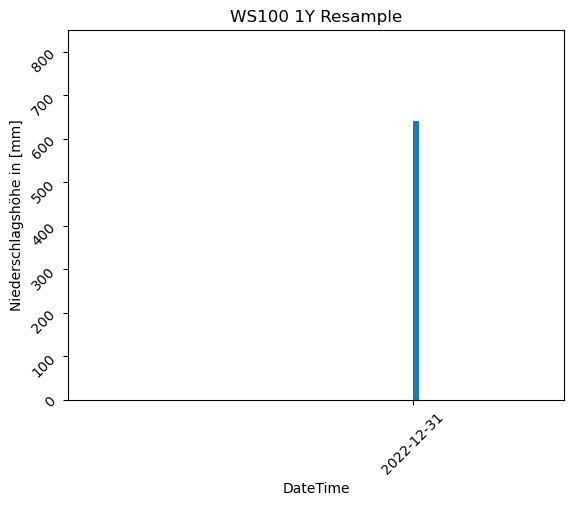

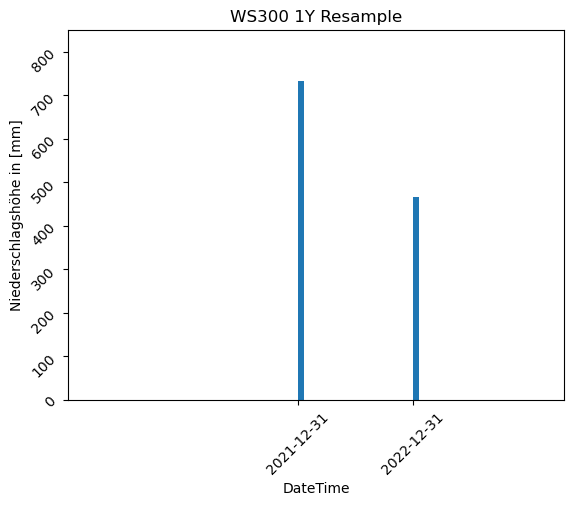

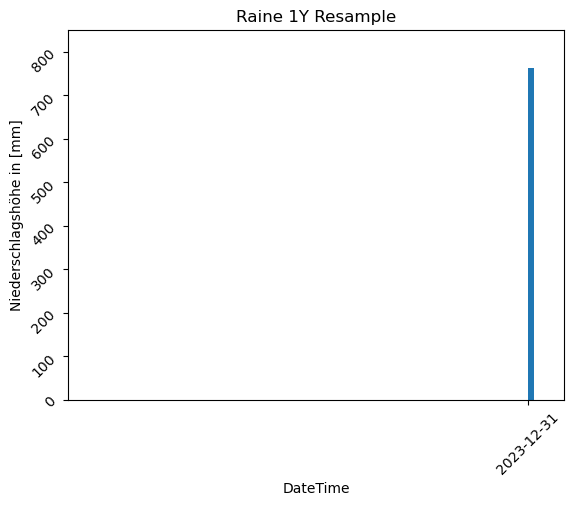

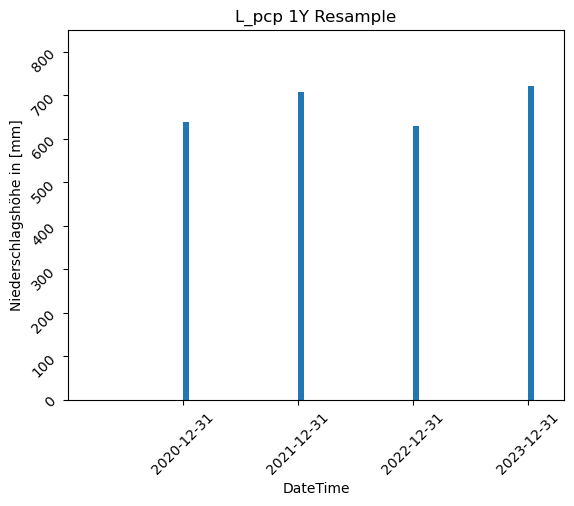

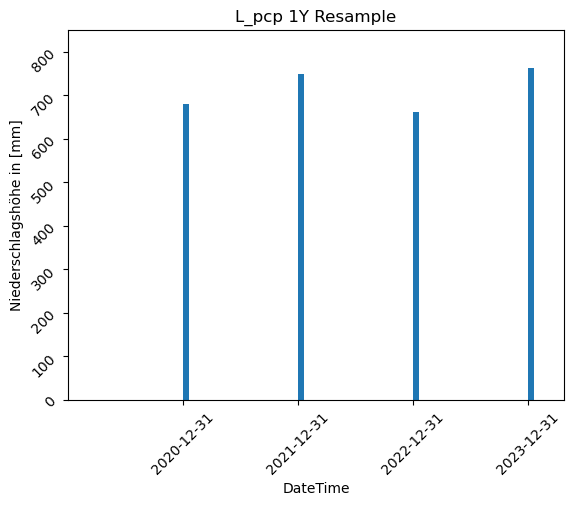

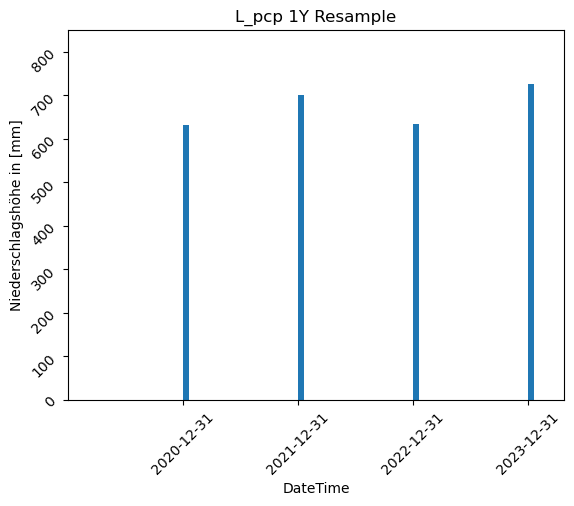

In [226]:
for list in list_stations_columns:
    if list[3] == '1Y':
        balkendiagramm(list[0], list[1], list[2], list[3])

In [149]:
# Summenwerte der verschiedenen Stationen vergleichen

In [150]:
# startindex WS100: 2021-10-20 17:00:00	
# endtindex WS100: 2023-10-20 16:21:00	

# startindex WS300: 2020-10-23 09:00:00	
# endtindex WS300: 2023-10-23 08:46:00	

# startindex Raine: 2022-11-03 11:46:00	
# endtindex Raine: 2024-04-22 17:13:00	

# startindex L_pcp: 2020-01-01 00:01:00	
# endtindex L_pcp: 2024-04-23 00:00:00	

# startindex lhg: 2021-01-01 00:00:00
# endtindex lhg: 2023-10-14 22:00:00

# sich überschneidender Zeitraum
# startindex: 2022-11-03
# endtindex: 2023-10-23

# frühester Index: 2020-01-01 00:01:00
# spätester Index: 2024-04-23 00:00:00

In [151]:
# erstelle datetime index für den gesamten maximalen Zeitraum
start = datetime.datetime(2020, 1, 1)
end = datetime.datetime(2024, 4, 23)
index_max_range = pd.date_range(start, end, freq='M')

In [152]:
# erstelle datetime index für den sich überschneidenden Zeitraum aller Stationen
start = datetime.datetime(2022, 11, 3)
end = datetime.datetime(2023, 10, 23)
index_überschneidend = pd.date_range(start, end, freq='M')

In [153]:
# # 1M
list_stations = [WS100_rtu_1M['precipitation.1'], WS300_rtu_1M['precipitation.1'], Raine_rtu_1M['Niederschlagsmenge'], L_pcp_rtu_1M['rr_07'], L_pcp_rtu_1M['rr_09'], L_pcp_rtu_1M['rr_10']]
# # 3M
# list_stations = [WS100_rtu_3M['precipitation.1'], WS300_rtu_3M['precipitation.1'], Raine_rtu_3M['Niederschlagsmenge'], L_pcp_rtu_3M['rr_07'], L_pcp_rtu_3M['rr_09'], L_pcp_rtu_3M['rr_10']]
# # 6M
# list_stations = [WS100_rtu_6M['precipitation.1'], WS300_rtu_6M['precipitation.1'], Raine_rtu_6M['Niederschlagsmenge'], L_pcp_rtu_6M['rr_07'], L_pcp_rtu_6M['rr_09'], L_pcp_rtu_6M['rr_10']]
# # 1Y
# list_stations = [WS100_rtu_1Y['precipitation.1'], WS300_rtu_1Y['precipitation.1'], Raine_rtu_1Y['Niederschlagsmenge'], L_pcp_rtu_1Y['rr_07'], L_pcp_rtu_1Y['rr_09'], L_pcp_rtu_1Y['rr_10']]

list_min_max_precip = [] # ['---', 'Sum_values_1M', '---']
list_min_max_index = []

for index in index_max_range:

    min_sum_val = 1000000000000
    min_found = False
    max_sum_val = 0
    max_found = False

    for station in list_stations:
        try:
            if station.loc[index] < min_sum_val:
                min_sum_val = station.loc[index]
                min_found = True
            if station.loc[index] > max_sum_val:
                max_sum_val = station.loc[index]
                max_found = True
        except KeyError:
            pass
    # if min_found and max_found == False:
    #     list_min_max_precip.append([index, round(min_sum_val, 2), 'No max value found'])
    # elif max_found and min_found == False:
    #     list_min_max_precip.append([index, 'No min value found', round(max_sum_val, 2)])
    # elif max_found and min_found:
    if min_found and max_found:
        # list_min_max_precip.append([index, round(min_sum_val, 2), round(max_sum_val, 2)])
        list_min_max_precip.append(round(max_sum_val - min_sum_val, 2))
        list_min_max_index.append(index)

In [154]:
# ausreißer = [x for x in list_min_max_precip if x > 18]

In [155]:
# index_ausreißer = [list_min_max_index[i] for i in [list_min_max_precip.index(ar) for ar in ausreißer]]

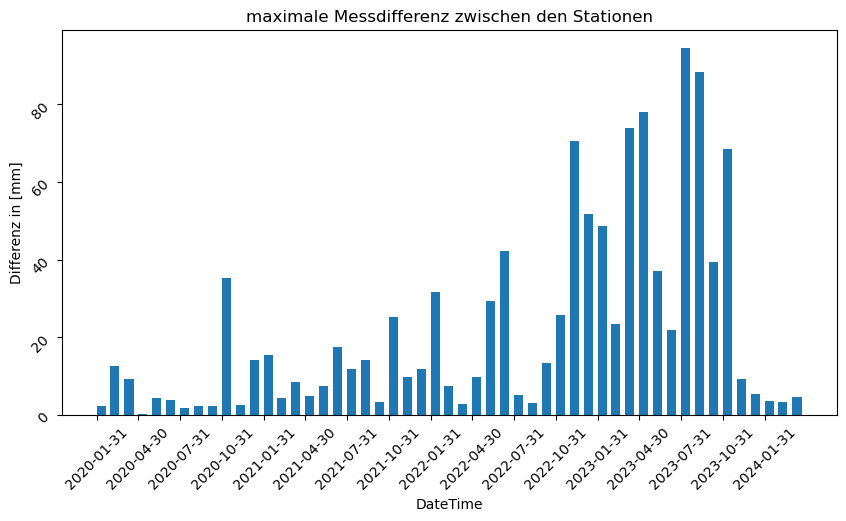

In [156]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(list_min_max_index, list_min_max_precip, width=20, align='edge')

ax.set_title('maximale Messdifferenz zwischen den Stationen')
ax.set_xlabel('DateTime')
ax.set_ylabel('Differenz in [mm]')

timedelta = list_min_max_index[2] - list_min_max_index[1]
if timedelta == datetime.timedelta(days=30) or timedelta == datetime.timedelta(days=31) or timedelta == datetime.timedelta(days=28) or timedelta == datetime.timedelta(days=29):
        plt.xticks(list_min_max_index[::3], rotation=45)
else:
    plt.xticks(list_min_max_index, rotation=45)
    
plt.yticks(rotation=45)

plt.show()

In [157]:
# for index in index_ausreißer:
#     print(summen_alle_Stationen.loc[index])

In [165]:
# differenz für die jeweiligen Monate plotten

In [166]:
summen_alle_Stationen.fillna('', inplace=True)

In [167]:
# summen_alle_Stationen

In [168]:
# summen_alle_Stationen = summen_alle_Stationen.applymap(lambda x: np.nan if isinstance(x, str) else x)

In [169]:
# summen_alle_Stationen

In [170]:
# zahl_mal_2 = lambda x, y: x * 2 + y

In [171]:
# zahl_mal_2(3, 4)

In [172]:
# summe_L_pcp[('1M', 'rr07')]

In [173]:
# Vergleiche Statoinen mit Raine
#
#
#
#
# startindex Raine: 2022-11-03 11:46:00	
# endtindex Raine: 2024-04-22 17:13:00

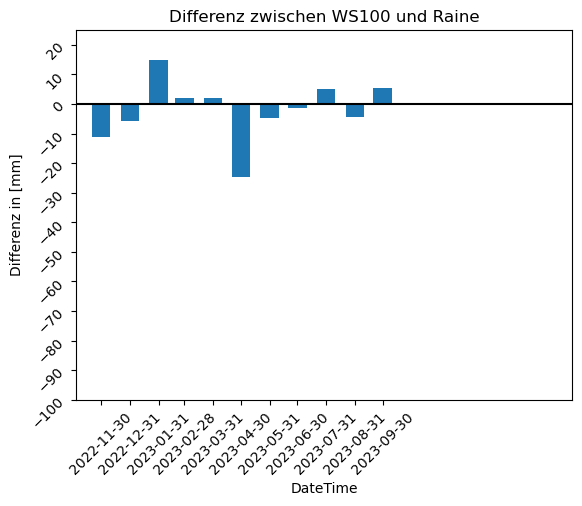

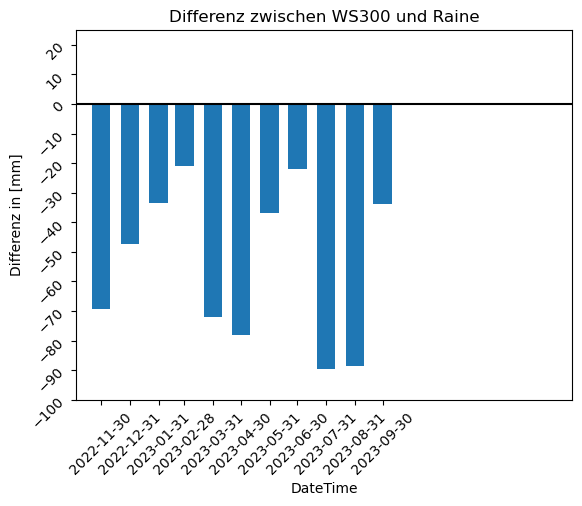

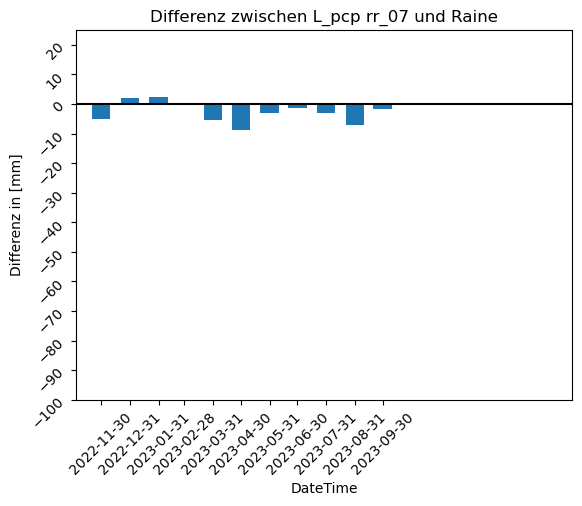

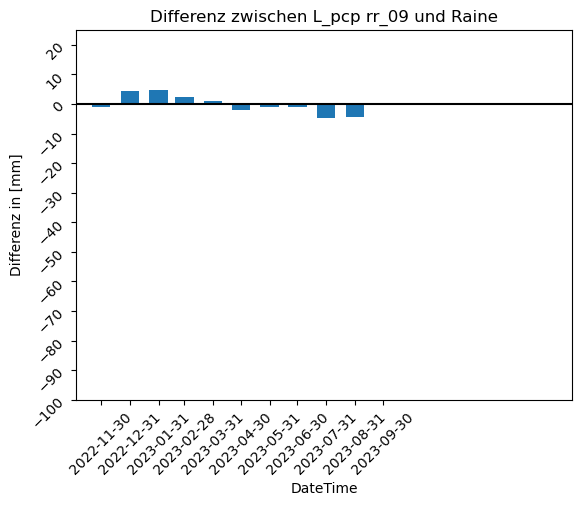

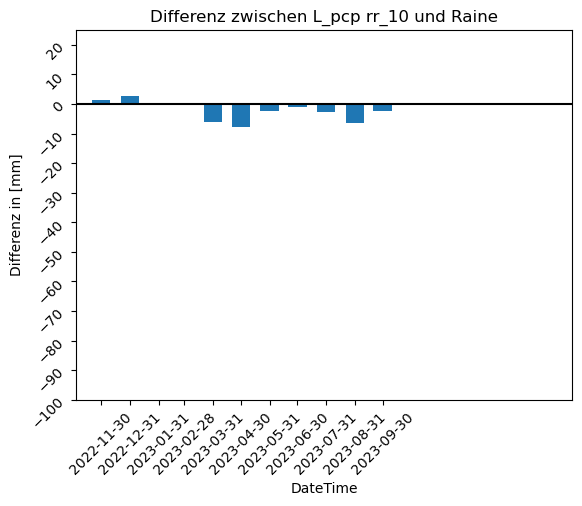

In [297]:
reference = Raine_rtu_1M['Niederschlagsmenge']

station_info = [[WS100_rtu_1M['precipitation.1'], 'WS100', 'Raine'], 
                [WS300_rtu_1M['precipitation.1'], 'WS300', 'Raine'],
                [L_pcp_rtu_1M['rr_07'], 'L_pcp rr_07', 'Raine'],
                [L_pcp_rtu_1M['rr_09'], 'L_pcp rr_09', 'Raine'],
                [L_pcp_rtu_1M['rr_10'], 'L_pcp rr_10', 'Raine']]

for i in range(len(station_info)):

    list_difference = [] 
    list_difference_index = []

    for index in index_überschneidend:

        try:
            difference = station_info[i][0].loc[index] - reference.loc[index]

            list_difference.append(difference)
            list_difference_index.append(index)
        except KeyError:
            pass

    # plot 

    data = list_difference
    index_input = list_difference_index

    fig, ax = plt.subplots()
    
    plt.hlines(0, pd.to_datetime('2020-01-01 00:01:00'), pd.to_datetime('2024-04-23 00:00:00'), colors='black', linestyles='solid')

    ax.bar(index_input, data, width=20, align='center')

    ax.set_title('Differenz zwischen ' + station_info[i][1] + ' und ' + station_info[i][2])
    ax.set_xlabel('DateTime')
    ax.set_ylabel('Differenz in [mm]')

    if len(index_input) > 40:
        plt.xticks(index_input[::3], rotation=45)
    else:
        plt.xticks(index_input, rotation=45)

    ax.set_xlim([pd.to_datetime('2022-11-03 00:00:00'), pd.to_datetime('2024-04-22 00:00:00')])

    ax.set_ylim(-95, 25)
    ax.set_yticks(np.arange(-100, 30, 10))
        
    plt.yticks(rotation=45)

    plt.show()

In [175]:
# same_index = reference.index.intersection(station.index)

In [176]:
import matplotlib.dates as mdates

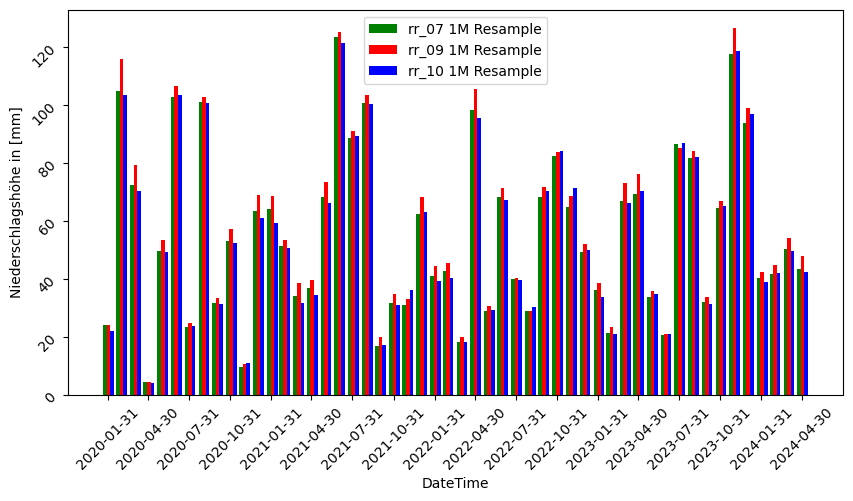

In [298]:
dataframe_1 = L_pcp_rtu_1M
column_1 = 'rr_07'
name_1 = 'rr_07 1M Resample'

dataframe_2 = L_pcp_rtu_1M
column_2 = 'rr_09'
name_2 = 'rr_09 1M Resample'

dataframe_3 = L_pcp_rtu_1M
column_3 = 'rr_10'
name_3 = 'rr_10 1M Resample'

dates = dataframe_1.index

x = mdates.date2num(dates)
width = 8
gap = 4

fig, ax = plt.subplots(figsize=(10, 5))

r1 = ax.bar(x - width - gap/2, dataframe_1[column_1], width, align='edge', color='green', label=name_1)
r2 = ax.bar(x - gap/2, dataframe_2[column_2], width, align='edge', color='red', label=name_2)
r3 = ax.bar(x + width - gap/2, dataframe_3[column_3], width, align='edge', color='blue', label=name_3)

# ax.set_title(name)

ax.set_xticks(x)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

ax.set_xlabel('DateTime')
ax.set_ylabel('Niederschlagshöhe in [mm]')

if len(dataframe_1.index) > 40:
    plt.xticks(dataframe_1.index[::3], rotation=45)
else:
    plt.xticks(dataframe_1.index, rotation=45)
    
plt.yticks(rotation=45)
plt.legend()

plt.show()

In [178]:
lhg05_rtu_1M = fct.resampleDf(lhg_rtu[['lhg05']], '1M', max_nan=1000000000)
lhg07_rtu_1M = fct.resampleDf(lhg_rtu[['lhg07']], '1M', max_nan=1000000000)
lhg09_rtu_1M = fct.resampleDf(lhg_rtu[['lhg09']], '1M', max_nan=1000000000)
lhg10_rtu_1M = fct.resampleDf(lhg_rtu[['lhg10']], '1M', max_nan=1000000000)
lhg11_rtu_1M = fct.resampleDf(lhg_rtu[['lhg11']], '1M', max_nan=1000000000)

In [179]:
# lhg05_rtu_1M.iloc[0].name

In [180]:
# print(lhg05_rtu_1M.iloc[0].name, lhg05_rtu_1M.iloc[-1].name)
# print(lhg07_rtu_1M.iloc[0].name, lhg07_rtu_1M.iloc[-1].name)
# print(lhg09_rtu_1M.iloc[0].name, lhg09_rtu_1M.iloc[-1].name)
# print(lhg10_rtu_1M.iloc[0].name, lhg10_rtu_1M.iloc[-1].name)
# print(lhg11_rtu_1M.iloc[0].name, lhg11_rtu_1M.iloc[-1].name)

In [273]:
lhg09_rtu_1M_vergleich = lhg09_rtu_1M[lhg09_rtu_1M > 0]
lhg09_rtu_1M_vergleich = lhg09_rtu_1M_vergleich.dropna()

In [277]:
lhg11_rtu_1M_vergleich = lhg11_rtu_1M[lhg11_rtu_1M > 0]
lhg11_rtu_1M_vergleich = lhg11_rtu_1M_vergleich.dropna()

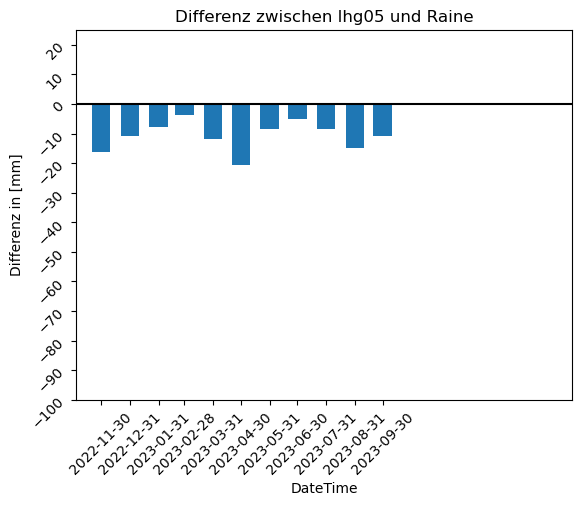

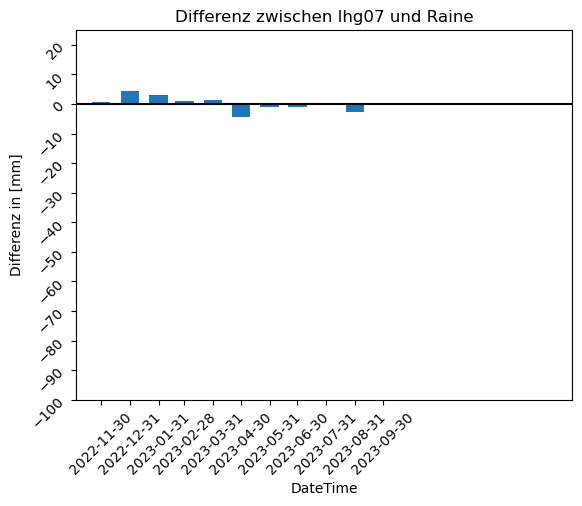

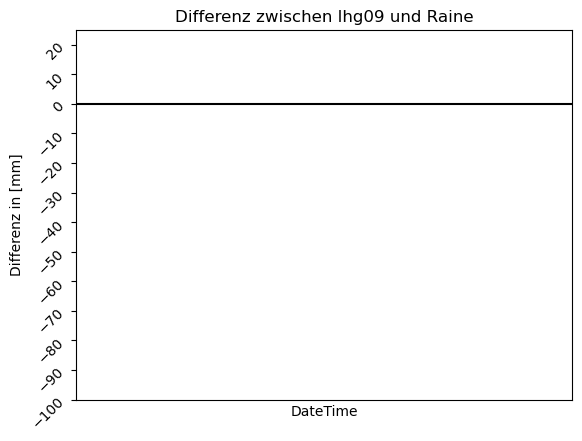

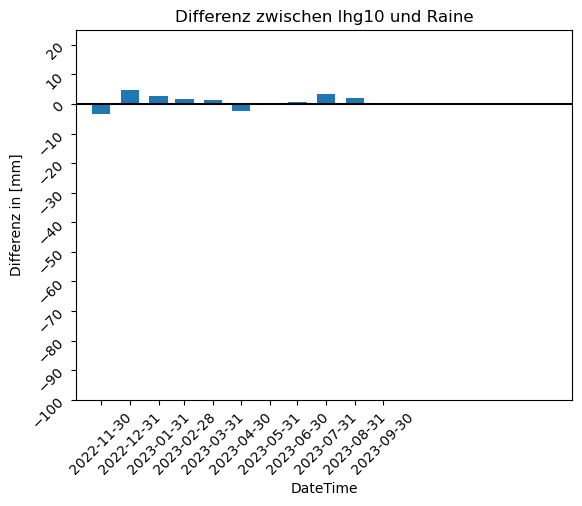

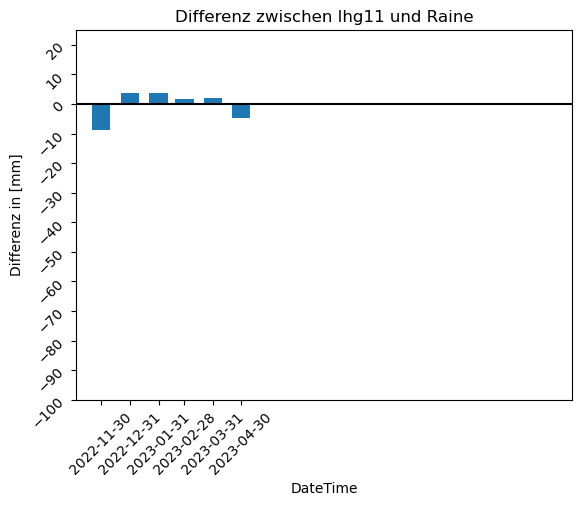

In [296]:
reference = Raine_rtu_1M['Niederschlagsmenge']

station_info = [[lhg05_rtu_1M['lhg05'], 'lhg05', 'Raine'],
                [lhg07_rtu_1M['lhg07'], 'lhg07', 'Raine'],
                [lhg09_rtu_1M_vergleich['lhg09'], 'lhg09', 'Raine'],
                [lhg10_rtu_1M['lhg10'], 'lhg10', 'Raine'],
                [lhg11_rtu_1M_vergleich['lhg11'], 'lhg11', 'Raine']]

for i in range(len(station_info)):

    index_gemeinsam = reference.index.intersection(station_info[i][0].index)

    list_difference = [] 
    list_difference_index = []

    for index in index_max_range:

        try:
            difference = station_info[i][0].loc[index] - reference.loc[index]

            list_difference.append(difference)
            list_difference_index.append(index)
        except KeyError:
            pass

    # plot 

    data = list_difference[:-1]
    index_input = list_difference_index[:-1]

    fig, ax = plt.subplots()

    plt.hlines(0, pd.to_datetime('2020-01-01 00:01:00'), pd.to_datetime('2024-04-23 00:00:00'), colors='black', linestyles='solid')

    ax.bar(index_input, data, width=20, align='center')

    ax.set_title('Differenz zwischen ' + station_info[i][1] + ' und ' + station_info[i][2])
    ax.set_xlabel('DateTime')
    ax.set_ylabel('Differenz in [mm]')

    if len(index_input) > 40:
        plt.xticks(index_input[::3], rotation=45)
    else:
        plt.xticks(index_input, rotation=45)
    
    ax.set_xlim([pd.to_datetime('2022-11-03 00:00:00'), pd.to_datetime('2024-04-22 00:00:00')])

    ax.set_ylim(-95, 25)
    ax.set_yticks(np.arange(-100, 30, 10))
    
    plt.yticks(rotation=45)

    plt.show()

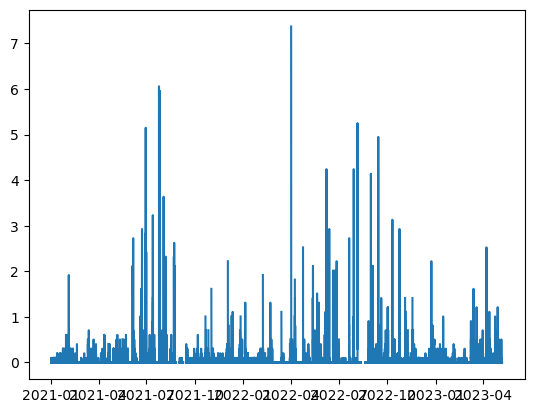

In [257]:
plt.plot(lhg_rtu['lhg11'])

In [246]:
def balkendiagramm(dataframe, column, name, timedelta):

    # print(dataframe[column])

    if timedelta == '1M':
        if column == 'lhg05' or column == 'lhg07' or column == 'lhg09' or column == 'lhg10' or column == 'lhg11':
            dataframe = dataframe.groupby([dataframe.index.year, dataframe.index.month]).filter(lambda x: len(x) == x.index.daysinmonth.unique()[0]*24*12)
        else:
            dataframe = dataframe.groupby([dataframe.index.year, dataframe.index.month]).filter(lambda x: len(x) == x.index.daysinmonth.unique()[0]*24*60)
    
        dataframe = fct.resampleDf(dataframe, '1M', max_nan=1000000000)
        # print(dataframe[column])
        
    if timedelta == '3M':
        laenge_monate = 3
    elif timedelta == '6M':
        laenge_monate = 6
    elif timedelta == '1Y':
        laenge_monate = 12

    if timedelta == '3M' or timedelta == '6M':
                
        if column == 'lhg05' or column == 'lhg07' or column == 'lhg09' or column == 'lhg10' or column == 'lhg11':
            dataframe = dataframe.groupby([dataframe.index.year, dataframe.index.month]).filter(lambda x: len(x) == x.index.daysinmonth.unique()[0]*24*12)
        else:
            dataframe = dataframe.groupby([dataframe.index.year, dataframe.index.month]).filter(lambda x: len(x) == x.index.daysinmonth.unique()[0]*24*60)
    
        while (len(dataframe[column].index.to_period('M').unique())/laenge_monate).is_integer() == False:

            # print(len(dataframe[column].index.to_period('M').unique()))
            
            # schauen, ob erster oder letzter Monat mehr brauchbare Werte hat
            # den Monat mit weniger brauchbaren Werten (also mehr nans) verwerfen
            
            date_start_a = dataframe[column].index[0]
            date_end_a = dataframe[column].index[0] + pd.DateOffset(months=1)
            sum_nans_a = dataframe[column].loc[date_start_a : date_end_a].isna().sum()

            date_start_e = dataframe[column].index[-1] - pd.DateOffset(months=1)
            date_end_e = dataframe[column].index[-1]
            sum_nans_e = dataframe[column].loc[date_start_e : date_end_e].isna().sum()

            if sum_nans_a > sum_nans_e:
                mask = (dataframe[column].index >= date_start_a) & (dataframe[column].index <= date_end_a)
                dataframe = dataframe.loc[~mask]
            else:
                mask = (dataframe[column].index >= date_start_e) & (dataframe[column].index <= date_end_e)
                dataframe = dataframe.loc[~mask]

        # print(len(dataframe[column].index.to_period('M').unique()))
        # print(len(dataframe[column].index.to_period('M').unique())/laenge_monate)

        # print(dataframe[column])

        dataframe = fct.resampleDf(dataframe, timedelta, max_nan=10000000000000)
        
        # if timedelta == '3M':
        #     dataframe = dataframe.loc[dataframe.index[1:-1]]
        # elif timedelta == '6M':
            
        dataframe = dataframe.loc[dataframe.index[1:]]

    if timedelta == '1Y':
        if column == 'lhg05' or column == 'lhg07' or column == 'lhg09' or column == 'lhg10' or column == 'lhg11':
            dataframe = dataframe.groupby([dataframe.index.year, dataframe.index.month]).filter(lambda x: len(x) == x.index.daysinmonth.unique()[0]*24*12)
        else:
            dataframe = dataframe.groupby([dataframe.index.year, dataframe.index.month]).filter(lambda x: len(x) == x.index.daysinmonth.unique()[0]*24*60)
        
        dataframe = fct.resampleDf(dataframe, timedelta, max_nan=10000000000000000)

    # print(dataframe[column])
          
    fig, ax = plt.subplots()

    ax.bar(dataframe.index, dataframe[column], width=20, align='edge')

    ax.set_title(name)
    ax.set_xlabel('DateTime')
    ax.set_ylabel('Precipitation in [mm]')

    ax.set_xlim([pd.to_datetime('2020-01-01 00:01:00'), pd.to_datetime('2024-04-23 00:00:00')])

    if timedelta == '1M':
        plt.xticks(dataframe.index[::3], rotation=45)
    else:
        plt.xticks(dataframe.index, rotation=45)

    if timedelta == '1M':
        plt.ylim(0, 150)
    elif timedelta == '3M':
        plt.ylim(0, 375)
    elif timedelta == '6M':
        plt.ylim(0, 550)
    elif timedelta == '1Y':
        plt.ylim(0, 850)

    plt.yticks(rotation=45)

    plt.show()
    
    return

In [249]:
list_stations_columns = [[lhg_rtu, 'lhg05', 'lhg05 1Y Resample'],
                        [lhg_rtu, 'lhg07', 'lhg07 1Y Resample'],
                        [lhg_rtu, 'lhg09', 'lhg09 1Y Resample'],
                        [lhg_rtu, 'lhg10', 'lhg10 1Y Resample'],
                        [lhg_rtu, 'lhg11', 'lhg11 1Y Resample']]

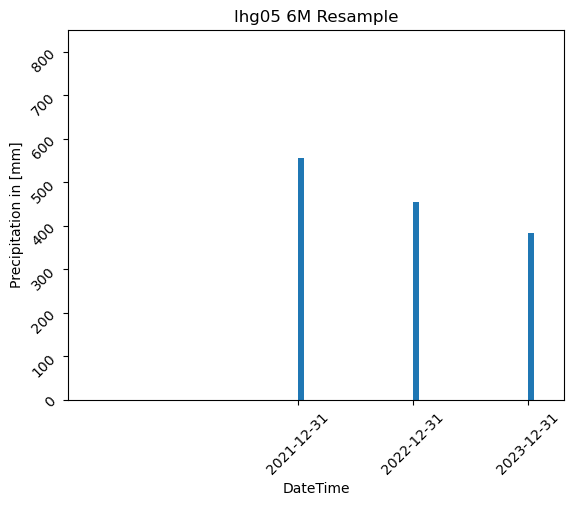

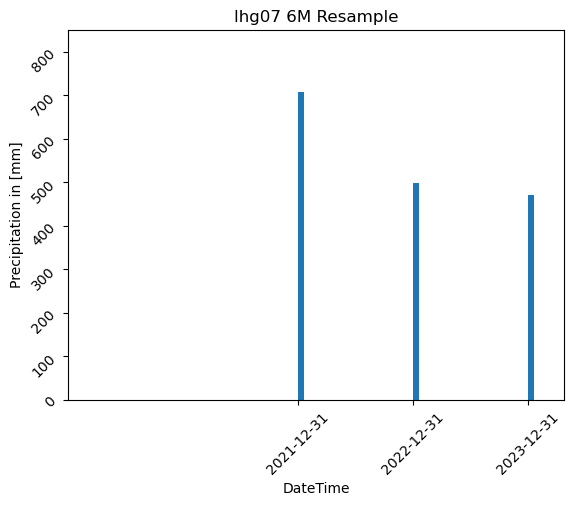

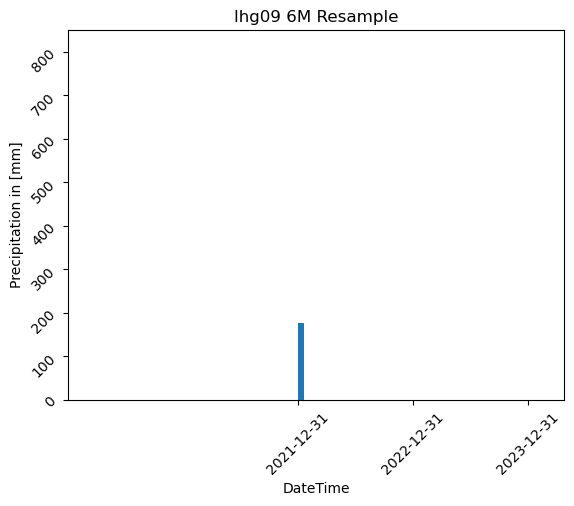

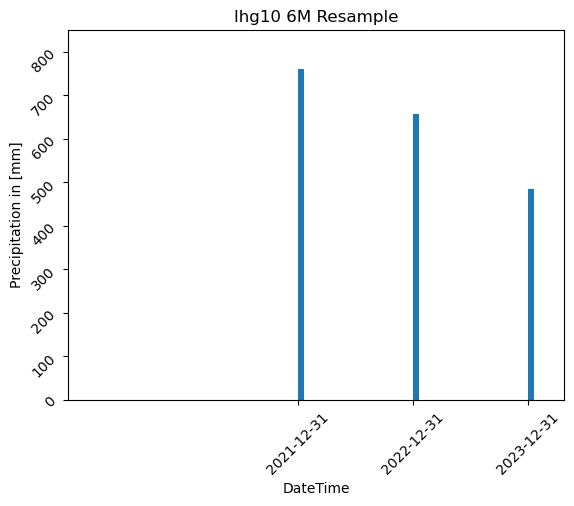

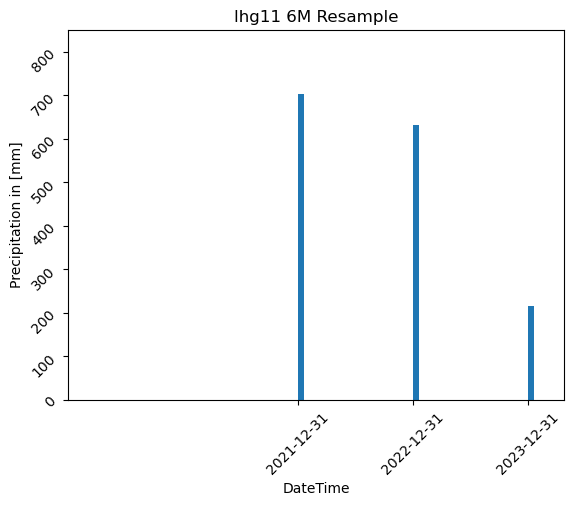

In [252]:
for list in list_stations_columns:
    balkendiagramm(list[0], list[1], list[2], timedelta='1Y')